# 1.5: Supervised Learning Algorithms Part 2-ANN


### The following script contains the following:
* 1. Import Libraries and Data 
* 2. Data Manipulation
* 3. Compare scaled vs unscaled data
* 4. Run ANN model
    - Check ANN model accuracy (training/test)
    - View confusion matrix

## 1.Import Libraries and Data 

In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [5]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [8]:
df = pd.read_csv(os.path.join(path,'02 Data', 'Original_Data','Dataset-weather-prediction-dataset-processed.csv'), index_col=False)

In [10]:
path = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project"
file_name = "Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"
file_path = os.path.join(path, '02 Data', 'Original_Data', file_name)

# Load the CSV
pleasantweather = pd.read_csv(file_path, index_col=False)

print("File loaded successfully!")

File loaded successfully!


## 2 Data Manipulation

In [15]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = df[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

# 3. Compare scaled vs unscaled data

In [38]:
#Create an 'X' matrix and y matrix by dropping the unneeded columns.
X = df.drop(['DATE','MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [40]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [42]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [46]:
X_train[:10]

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,20.4,13.6,26.9,22.5,16.2,28.6,22.5,18.6,27.1,16.3,...,16.5,2.3,0.8,3.8,8.5,5.0,11.9,15.6,13.7,17.6
20472,-1.8,-3.2,-0.5,-3.6,-6.0,0.1,-3.3,-7.2,-0.2,-2.5,...,-8.2,-17.4,-19.2,-15.6,-6.9,-9.4,-4.6,10.7,7.9,13.5
18269,-1.8,-6.0,0.7,3.2,1.6,6.7,-0.4,-1.3,1.0,-4.9,...,-11.7,-14.1,-15.5,-12.7,-8.3,-13.3,-5.5,1.0,-3.9,5.9
7713,-1.4,-3.8,2.1,0.7,0.3,2.5,1.5,-0.2,4.0,0.2,...,-2.9,-20.9,-22.4,-19.4,-2.2,-5.2,-1.5,6.8,5.5,9.6
21958,6.1,1.8,13.5,6.7,1.7,11.7,6.2,2.6,10.8,5.7,...,5.3,-14.7,-16.6,-12.7,1.0,-0.6,3.5,10.7,7.9,13.5
11464,18.3,10.6,24.1,18.7,14.7,24.0,18.7,14.5,22.0,12.1,...,16.3,-2.6,-3.9,-1.3,10.0,7.7,15.6,13.1,9.0,16.9
3984,3.7,-0.5,6.3,4.4,3.4,5.0,4.7,4.3,5.4,5.2,...,-0.2,-2.6,-4.1,-1.0,1.1,0.0,2.6,10.9,9.3,12.5
4752,-3.9,-7.4,-1.6,0.5,0.0,1.7,2.1,1.3,2.8,2.3,...,3.5,-10.3,-12.3,-8.2,1.3,-1.2,3.0,10.5,9.7,11.4
11092,15.7,11.2,22.4,21.3,14.1,26.9,20.6,15.7,25.7,13.5,...,19.3,-0.7,-2.2,0.8,11.9,8.6,15.8,12.6,9.5,15.8
21377,18.8,9.9,26.0,23.6,20.1,27.2,21.6,16.9,27.2,19.0,...,29.3,4.4,-0.7,9.5,20.0,14.2,26.4,10.7,7.9,13.5


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


In [50]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

<Axes: title={'center': 'After Scaling'}, xlabel='BASEL_temp_mean', ylabel='Density'>

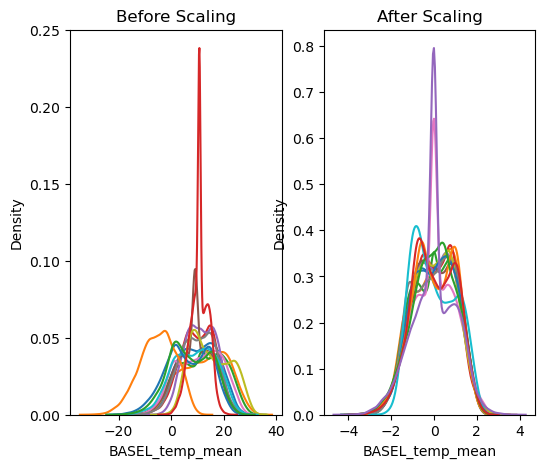

In [52]:
# Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BELGRADE_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BUDAPEST_temp_mean'], ax=ax1)
sns.kdeplot(X_train['DEBILT_temp_mean'], ax=ax1)
sns.kdeplot(X_train['HEATHROW_temp_mean'], ax=ax1)
sns.kdeplot(X_train['KASSEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['LJUBLJANA_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MAASTRICHT_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MADRID_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MUNCHENB_temp_mean'], ax=ax1)
sns.kdeplot(X_train['OSLO_temp_mean'], ax=ax1)
sns.kdeplot(X_train['SONNBLICK_temp_mean'], ax=ax1)
sns.kdeplot(X_train['STOCKHOLM_temp_mean'], ax=ax1)
sns.kdeplot(X_train['VALENTIA_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BELGRADE_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BUDAPEST_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DEBILT_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DUSSELDORF_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['HEATHROW_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['KASSEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['LJUBLJANA_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MAASTRICHT_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MADRID_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MUNCHENB_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['OSLO_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['SONNBLICK_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['STOCKHOLM_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['VALENTIA_temp_mean'], ax=ax2)

# 4. Run ANN model 1
    - Check ANN model accuracy (training/test)
    - View confusion matrix

In [55]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [57]:
#testing ANN accuracy
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4581106204973274
0.4630533286859533


#### ANN model  for y_pred_test/y_test has an accuracy score of 0.463%, the train data has an accuracy of 0.457%

In [60]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3938,  400], [ 507,  893]],
    [[3191,  585], [ 424, 1538]],
    [[3314,  586], [ 369, 1469]],
    [[4362,  275], [ 495,  606]],
    [[4150,  357], [ 563,  668]],
    [[4091,  479], [ 510,  658]],
    [[4591,  224], [ 495,  428]],
    [[3658,  537], [ 402, 1141]],
    [[4254,  308], [ 479,  697]],
    [[2751,  417], [ 269, 2301]],
    [[4250,  296], [ 491,  701]],
    [[4677,  202], [ 415,  444]],
    [[5738,    0], [   0,    0]],
    [[4539,  227], [ 457,  515]],
    [[5459,    3], [ 274,    2]]
]) #Change array

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

Accuracy scores for each group:
Group 1: 0.8419
Group 2: 0.8242
Group 3: 0.8336
Group 4: 0.8658
Group 5: 0.8397
Group 6: 0.8276
Group 7: 0.8747
Group 8: 0.8364
Group 9: 0.8628
Group 10: 0.8804
Group 11: 0.8628
Group 12: 0.8925
Group 13: 1.0000
Group 14: 0.8808
Group 15: 0.9517


In [62]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Figure saved successfully at: C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_training_matrix.png


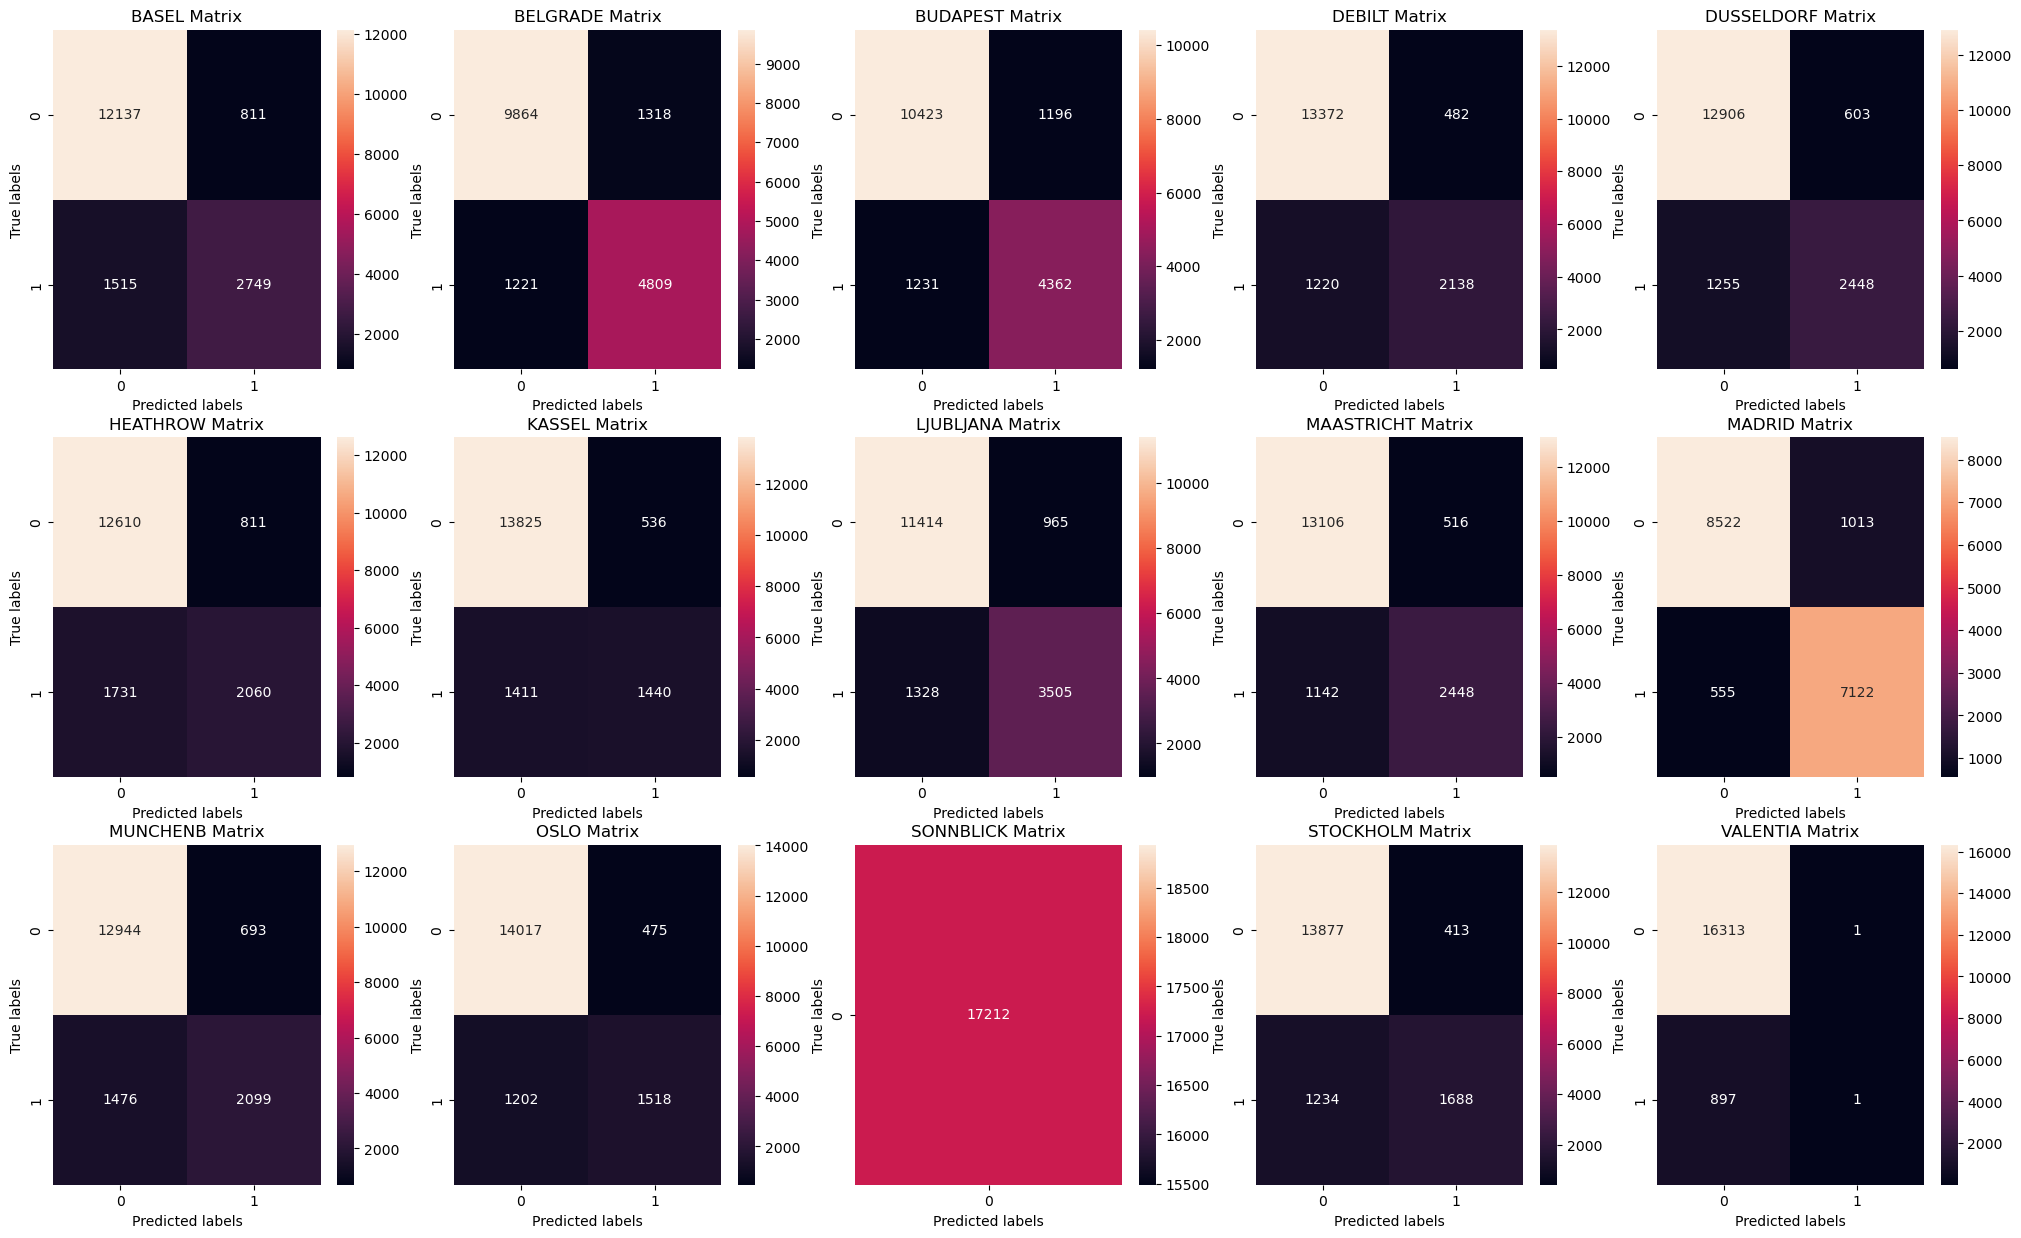

In [77]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_training_matrix.png"

# Save the figure
figure.savefig(output_file, dpi=300, bbox_inches='tight')

print(f"Figure saved successfully at: {output_file}")

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Figure saved successfully at: C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_test_matrix.png


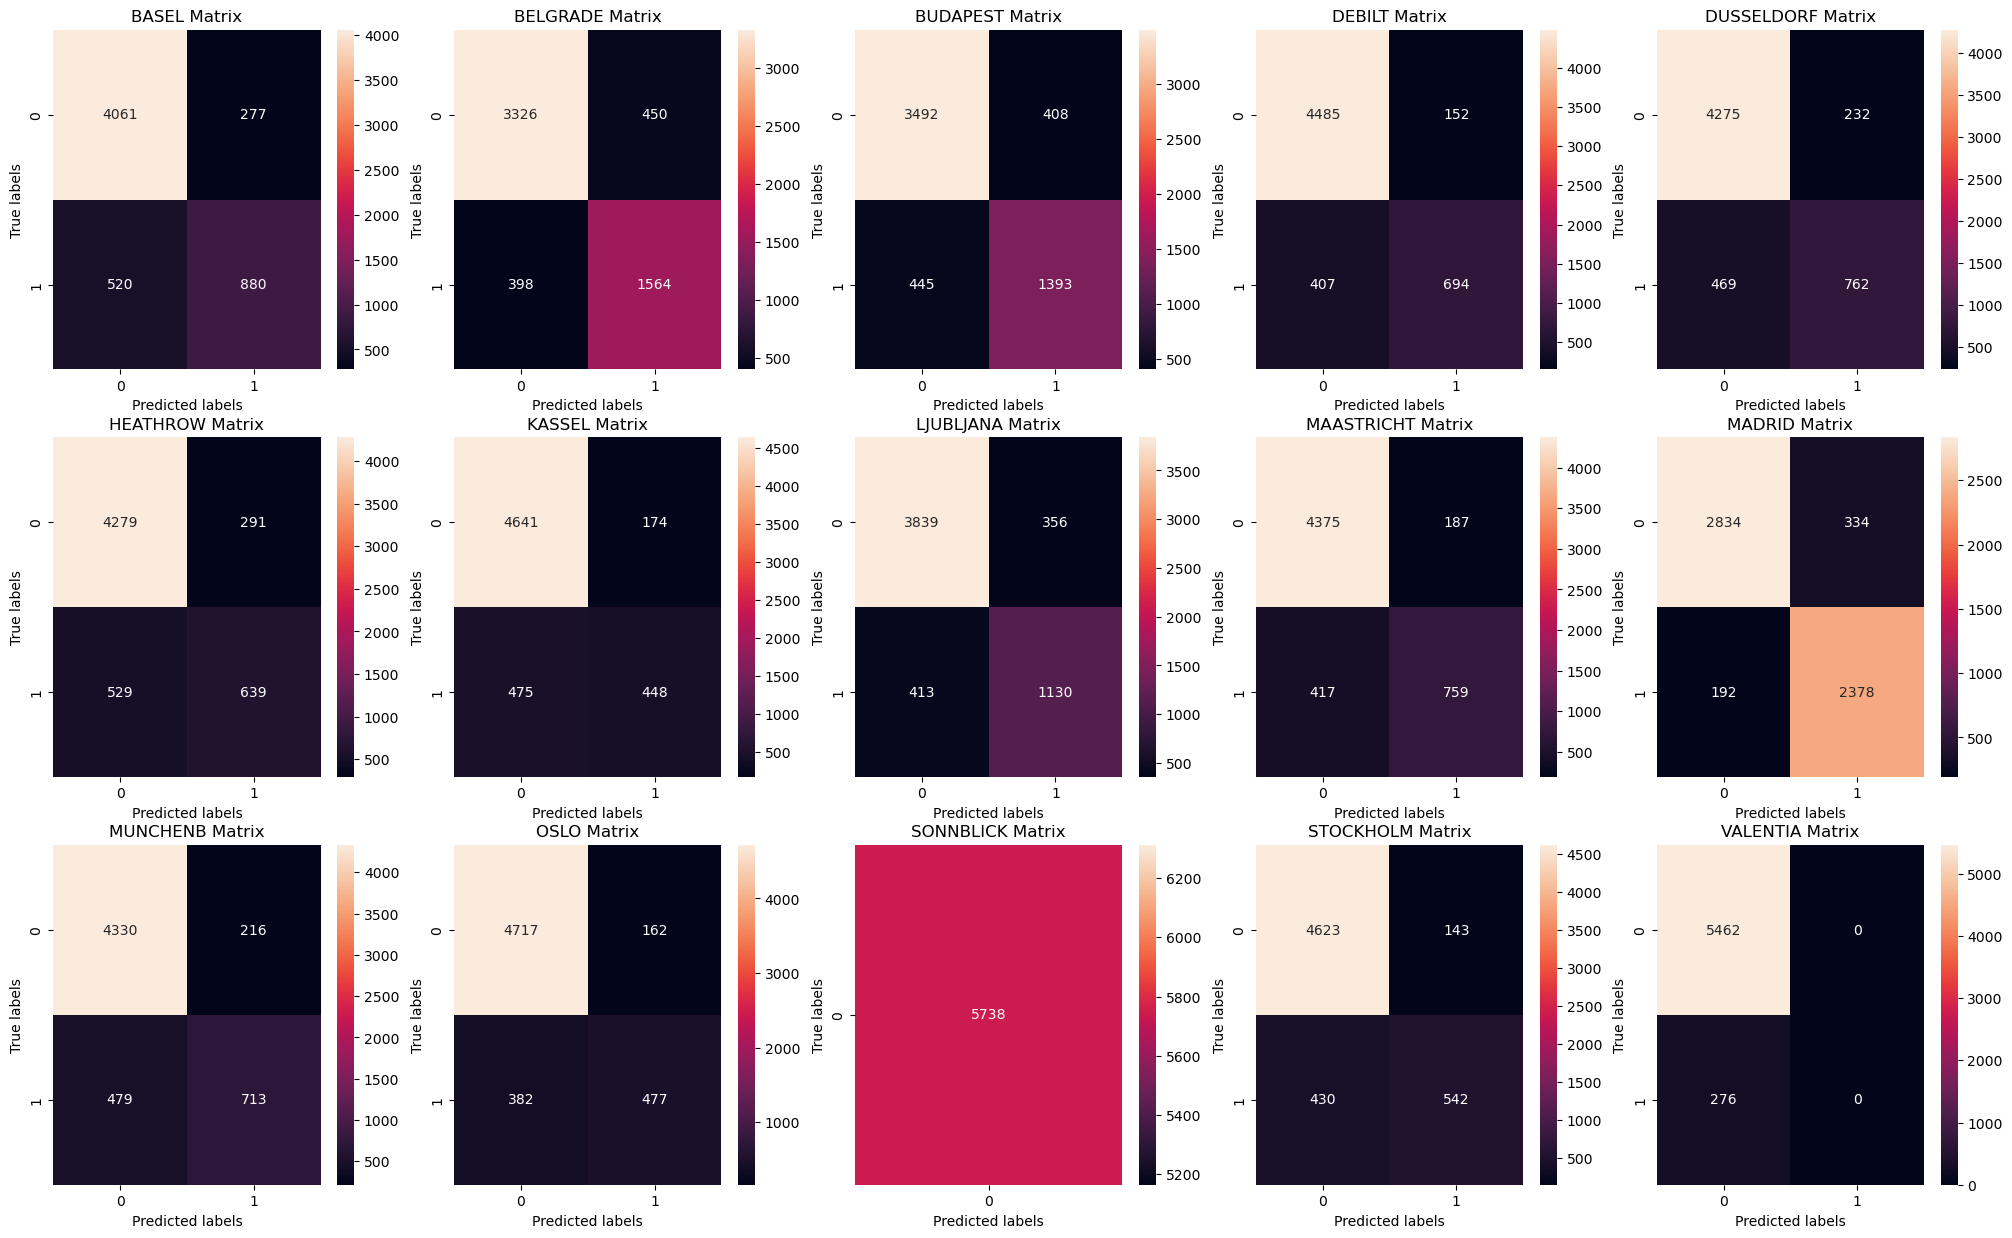

In [79]:
# Plot multilabel confusion matrix for (test accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_test_matrix.png"

# Save the figure
figure.savefig(output_file, dpi=300, bbox_inches='tight')

print(f"Figure saved successfully at: {output_file}")

# 4. Run ANN model 2
    - Check ANN model accuracy (training/test)
    - View confusion matrix

In [69]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [70]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4654891935858703
0.4696758452422447


In [71]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3924,  414],[ 456,  944]],
    [[3142,  634],[ 380, 1582]],
    [[3341,  559], [ 330, 1508]],
    [[4289,  348], [ 416,  685]],
    [[4087,  420], [ 504,  727]],
    [[4171,  399], [ 529,  639]],
    [[4551,  264], [ 350,  573]],
    [[3646,  549], [ 389, 1154]],
    [[4179,  383], [ 389,  787]],
    [[2739,  429], [ 210, 2360]],
    [[4184,  362], [ 392,  800]],
    [[4659,  220], [ 392,  467]],
    [[5738,    0], [   0,    0]],
    [[4541,  225], [ 404,  568]],
    [[5430,   32], [ 240,   36]]
]) #Change array

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

Accuracy scores for each group:
Group 1: 0.8484
Group 2: 0.8233
Group 3: 0.8451
Group 4: 0.8669
Group 5: 0.8390
Group 6: 0.8383
Group 7: 0.8930
Group 8: 0.8365
Group 9: 0.8655
Group 10: 0.8886
Group 11: 0.8686
Group 12: 0.8933
Group 13: 1.0000
Group 14: 0.8904
Group 15: 0.9526


C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Figure saved successfully at: C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_training_matrix_2.png


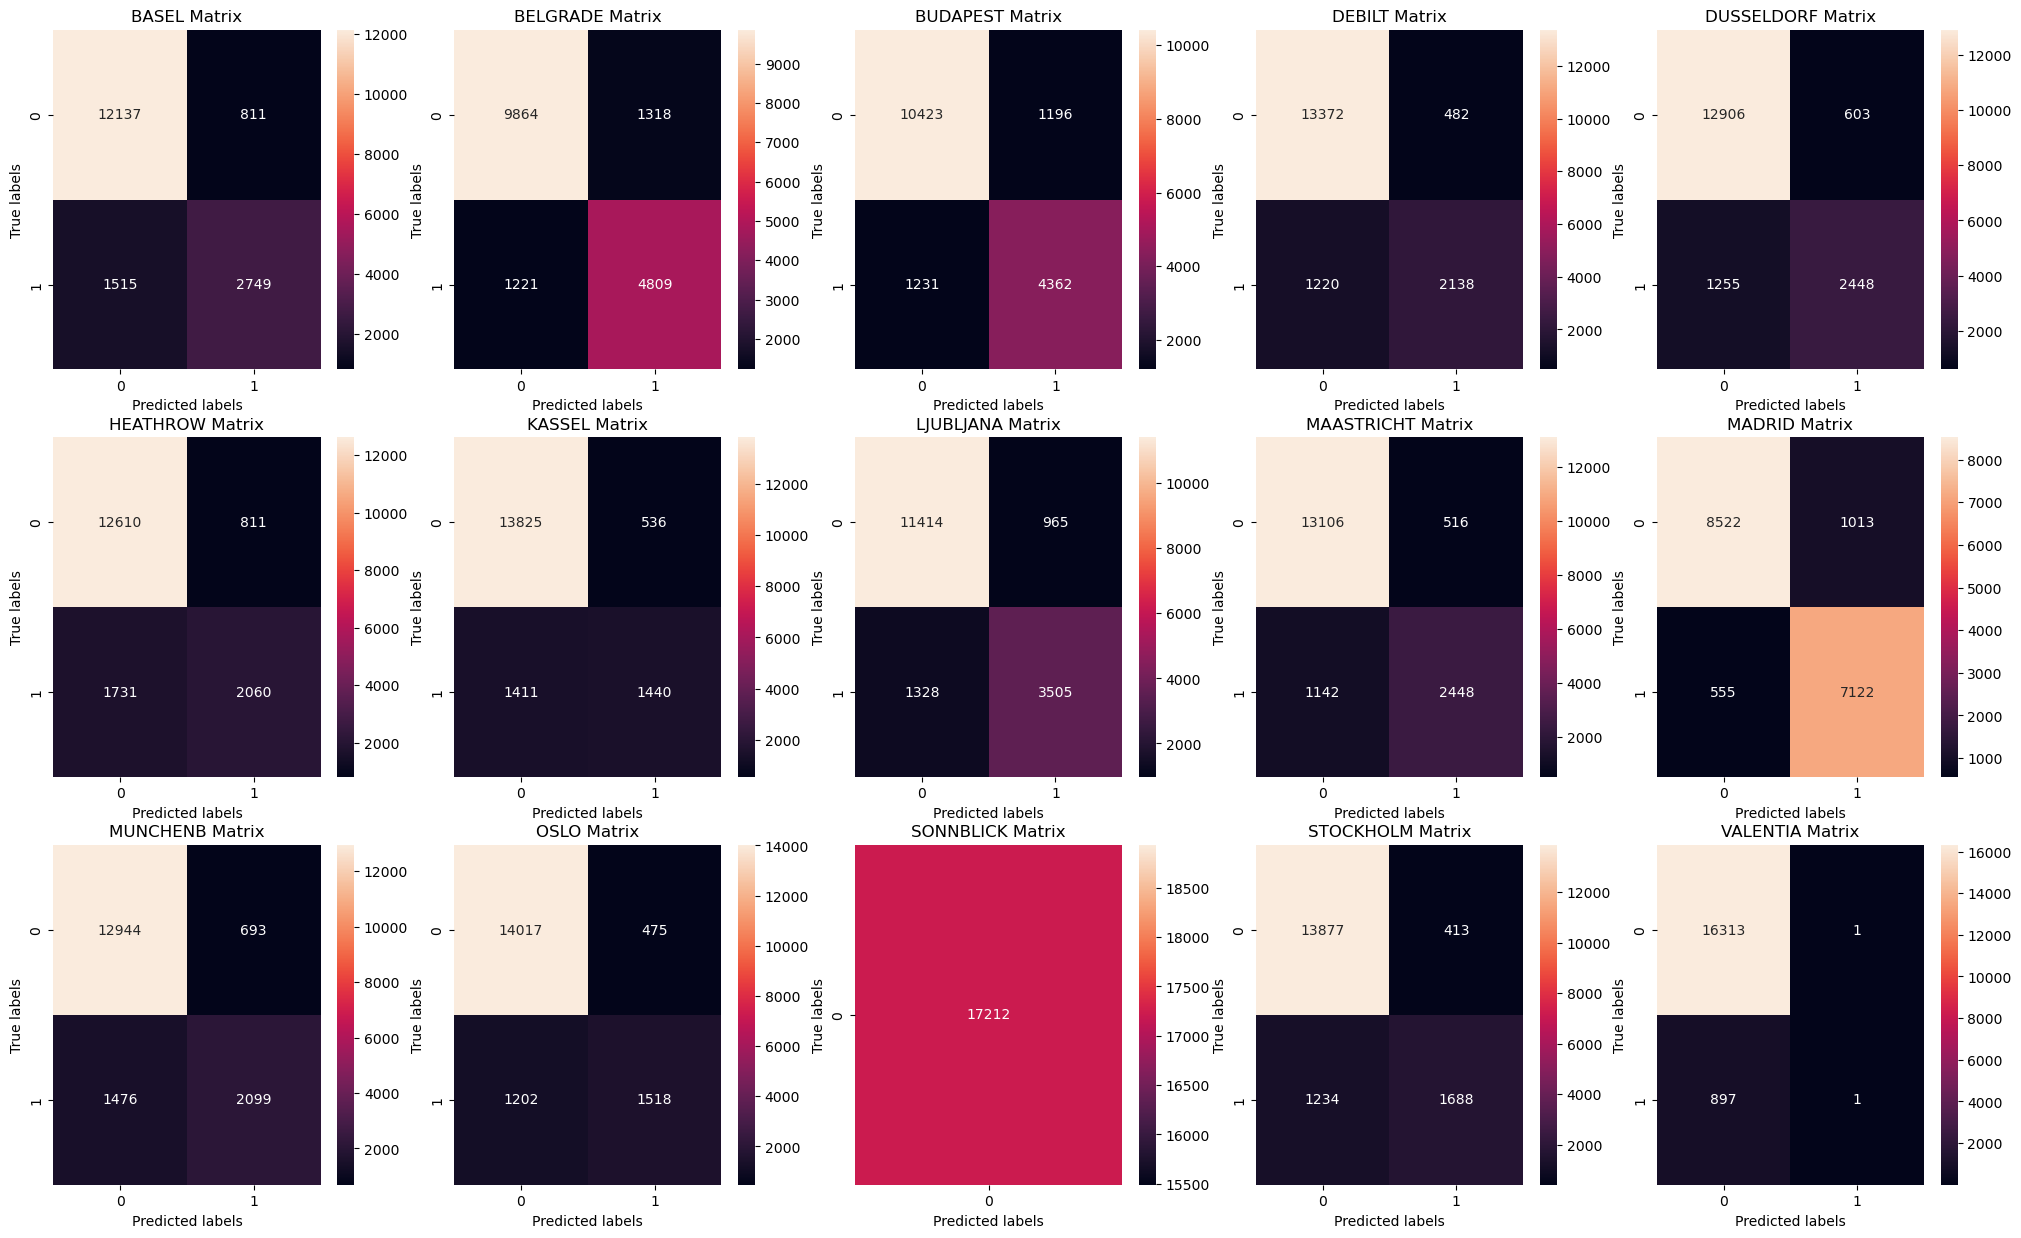

In [81]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_training_matrix_2.png"

# Save the figure
figure.savefig(output_file, dpi=300, bbox_inches='tight')

print(f"Figure saved successfully at: {output_file}")

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Figure saved successfully at: C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_test_matrix_2.png


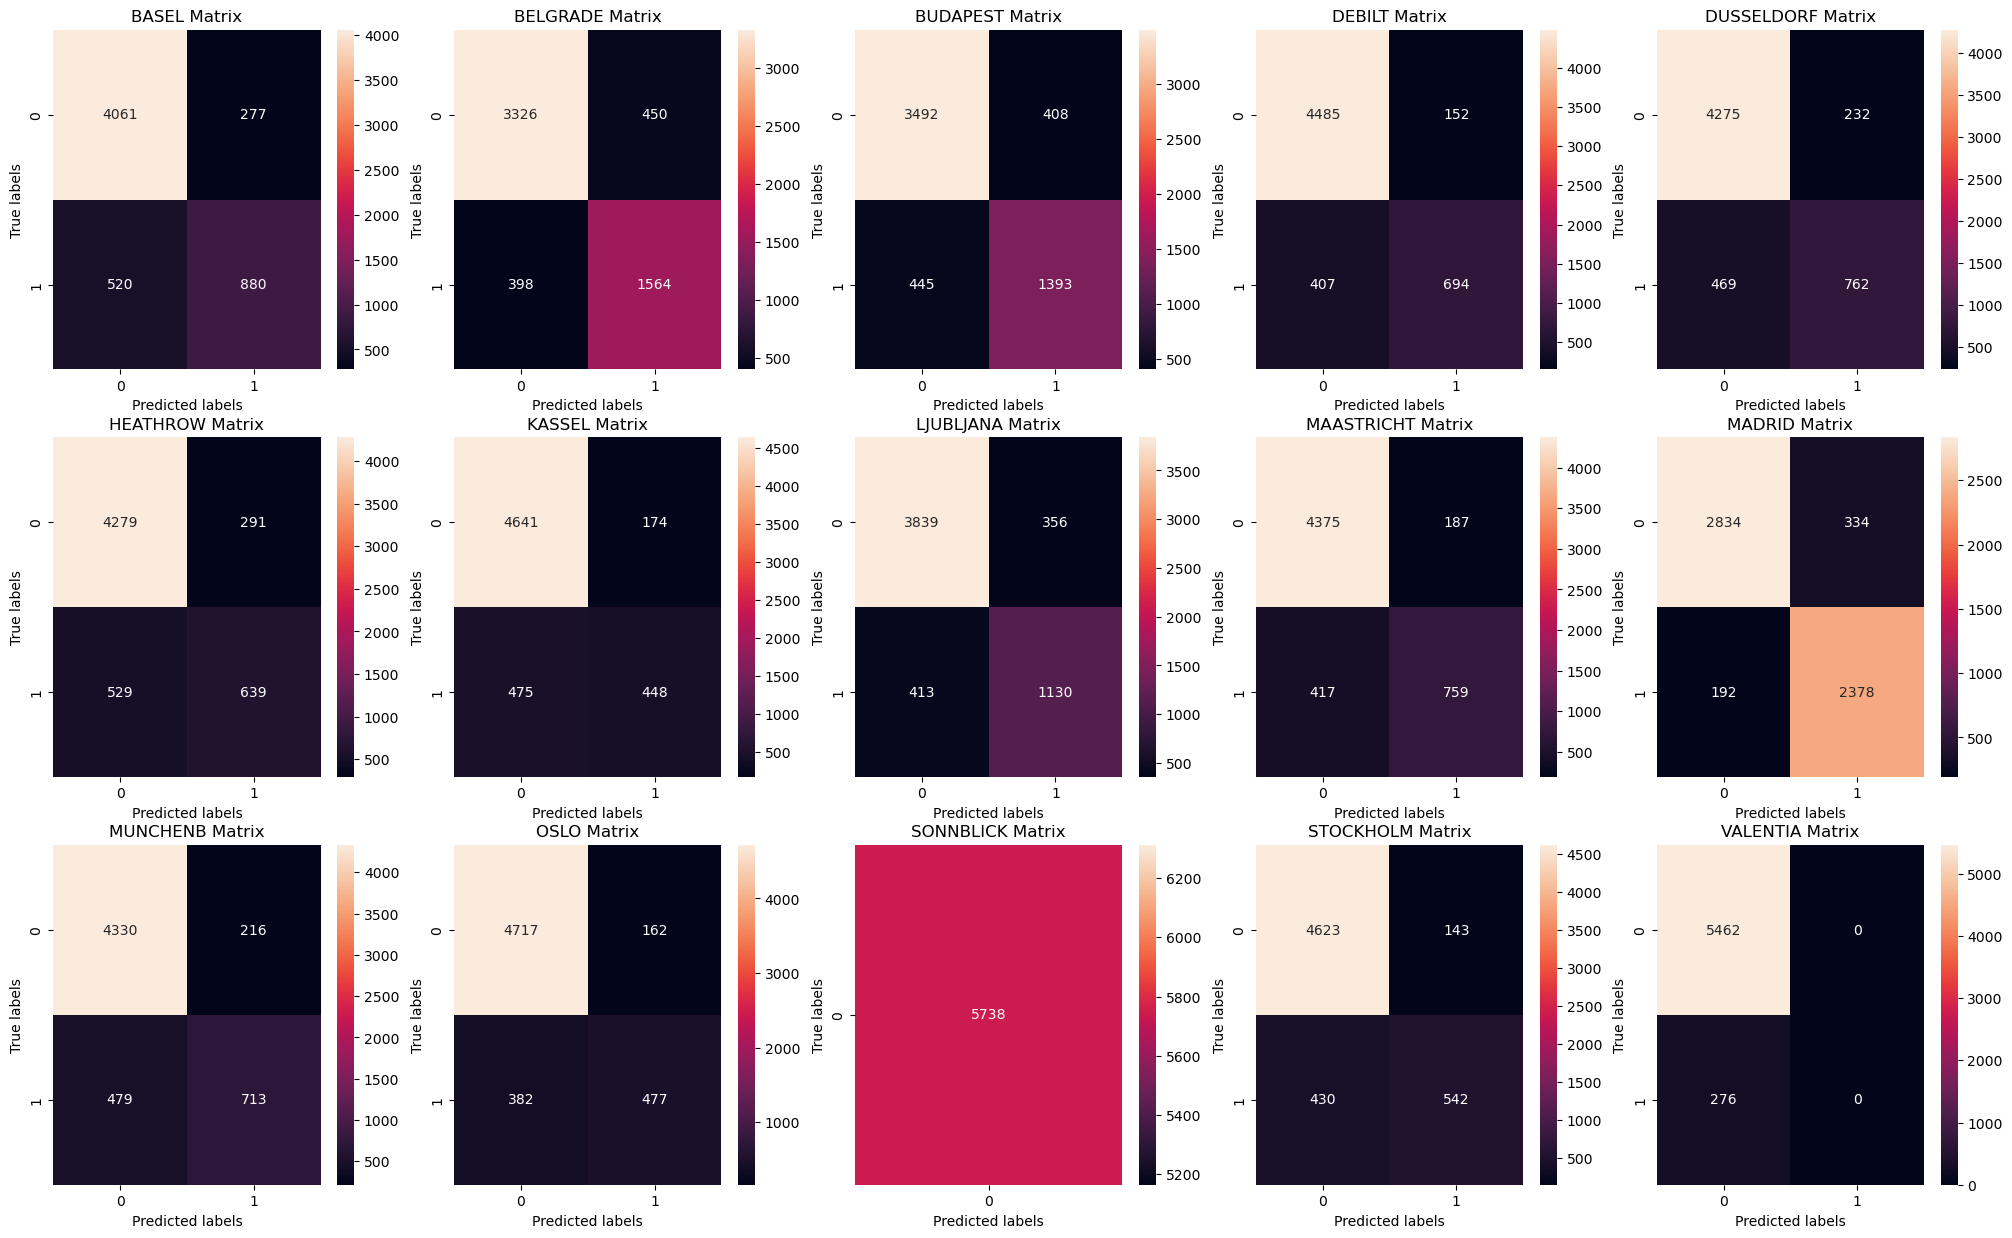

In [83]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_test_matrix_2.png"

# Save the figure
figure.savefig(output_file, dpi=300, bbox_inches='tight')

print(f"Figure saved successfully at: {output_file}")

# 4. Run ANN model 3

In [86]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(70, 60, 60), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70, 60, 60), max_iter=1000)

In [87]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5413083894957007
0.4904147786685256


In [88]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3934,  404],[ 445,  955]],
    [[3168,  608],[ 371, 1591]],
    [[3458,  442],[ 411, 1427]],
    [[4295,  342],[ 394,  707]],
    [[4104,  403],[ 437,  794]],
    [[4217,  353],[ 515,  653]],
    [[4563,  252],[ 321,  602]],
    [[3760,  435],[ 411, 1132]],
    [[4224,  338],[ 373,  803]],
    [[2740,  428],[ 209, 2361]],
    [[4185,  361],[ 364,  828]],
    [[4694,  185],[ 391,  468]],
    [[5738,    0],[   0,    0]],
    [[4521,  245],[ 351,  621]],
    [[5429,   33],[ 231,   45]]
]) #Change array

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

Accuracy scores for each group:
Group 1: 0.8520
Group 2: 0.8294
Group 3: 0.8513
Group 4: 0.8717
Group 5: 0.8536
Group 6: 0.8487
Group 7: 0.9001
Group 8: 0.8526
Group 9: 0.8761
Group 10: 0.8890
Group 11: 0.8736
Group 12: 0.8996
Group 13: 1.0000
Group 14: 0.8961
Group 15: 0.9540


C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Figure saved successfully at: C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_training_matrix_3.png


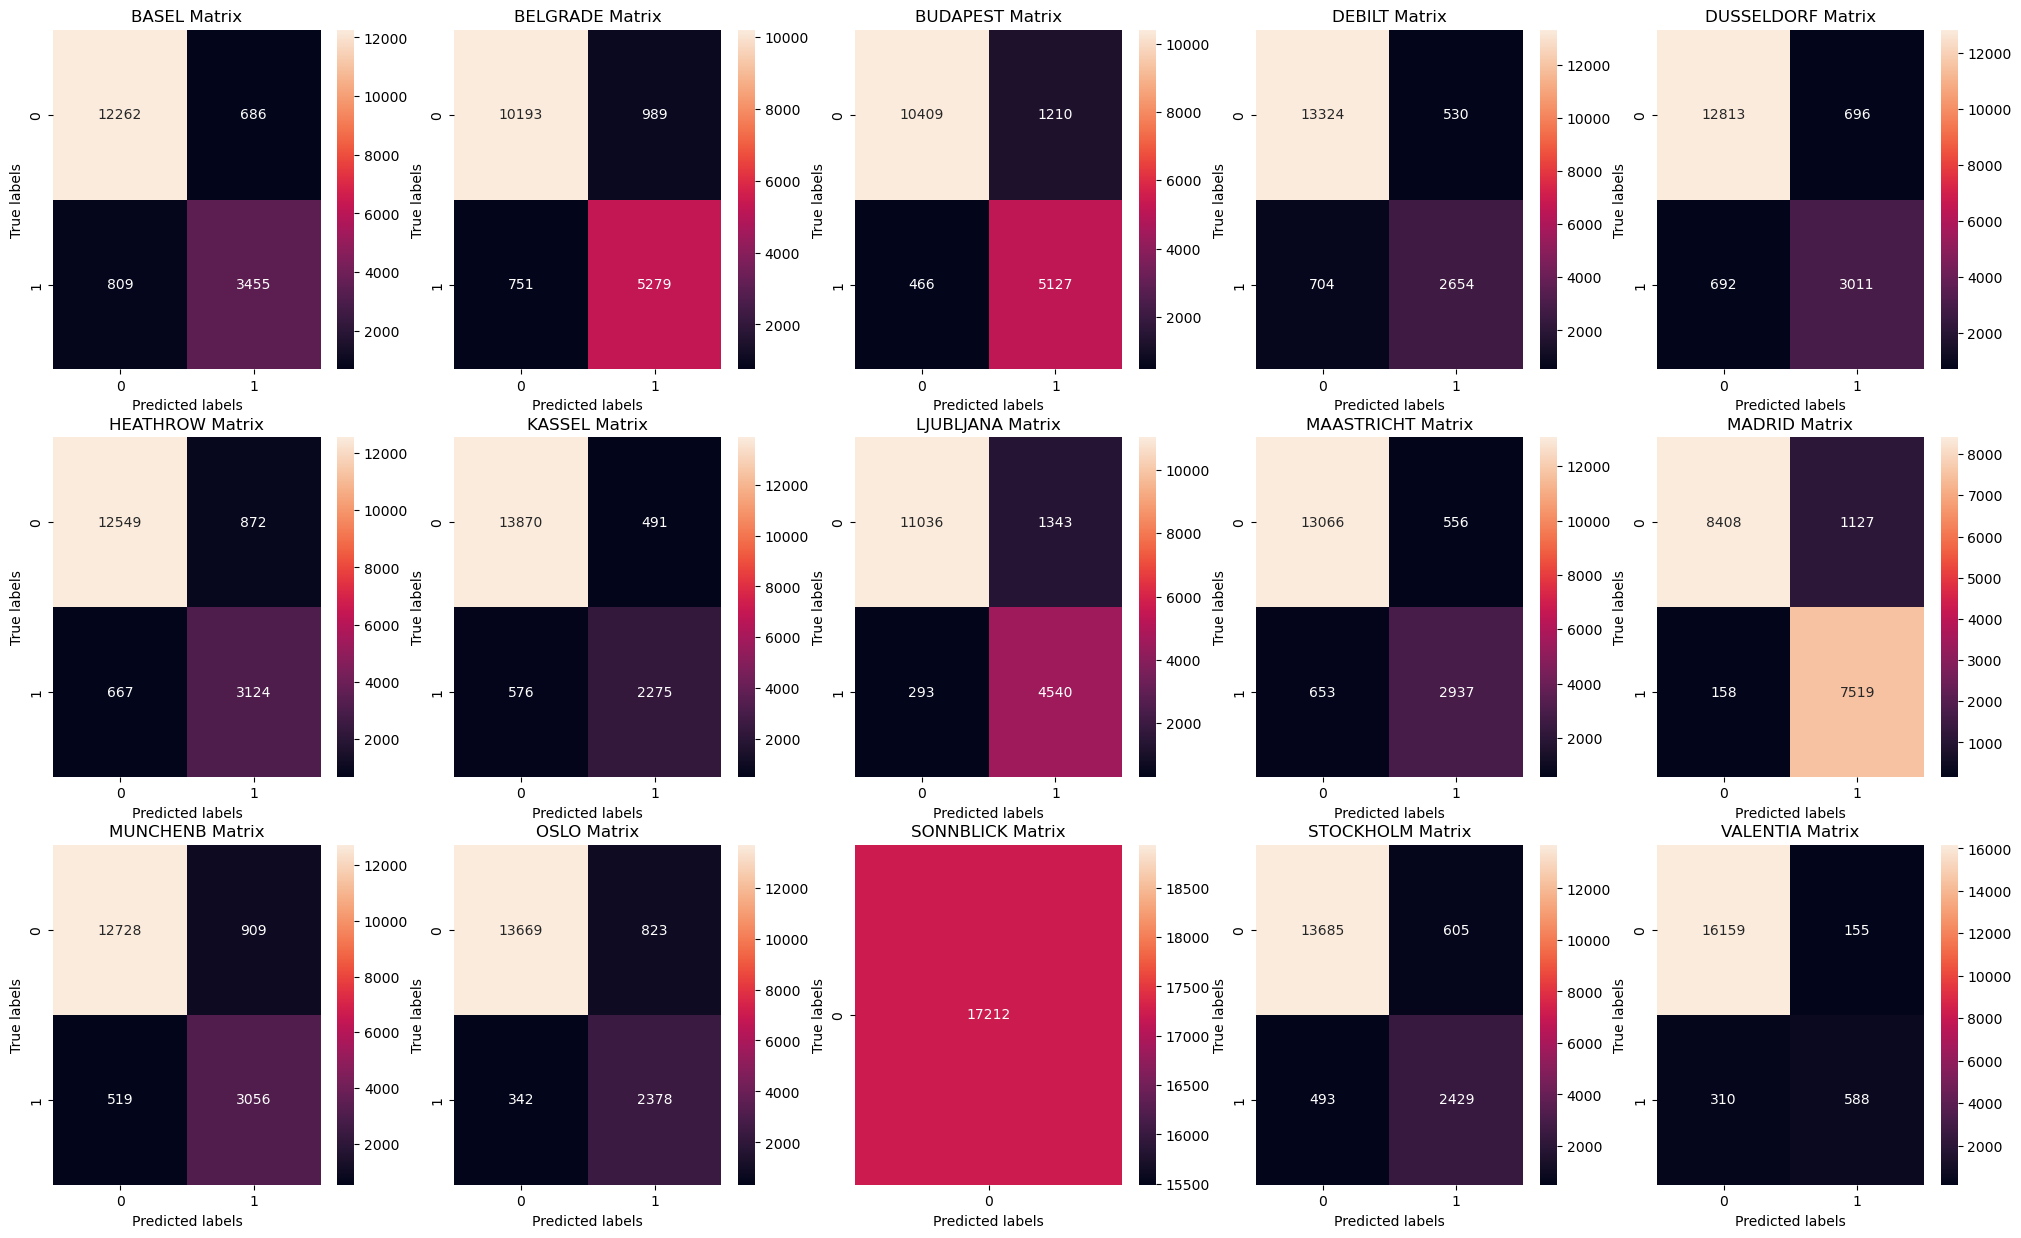

In [89]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_training_matrix_3.png"

# Save the figure
figure.savefig(output_file, dpi=300, bbox_inches='tight')

print(f"Figure saved successfully at: {output_file}")

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Figure saved successfully at: C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_test_matrix_3.png


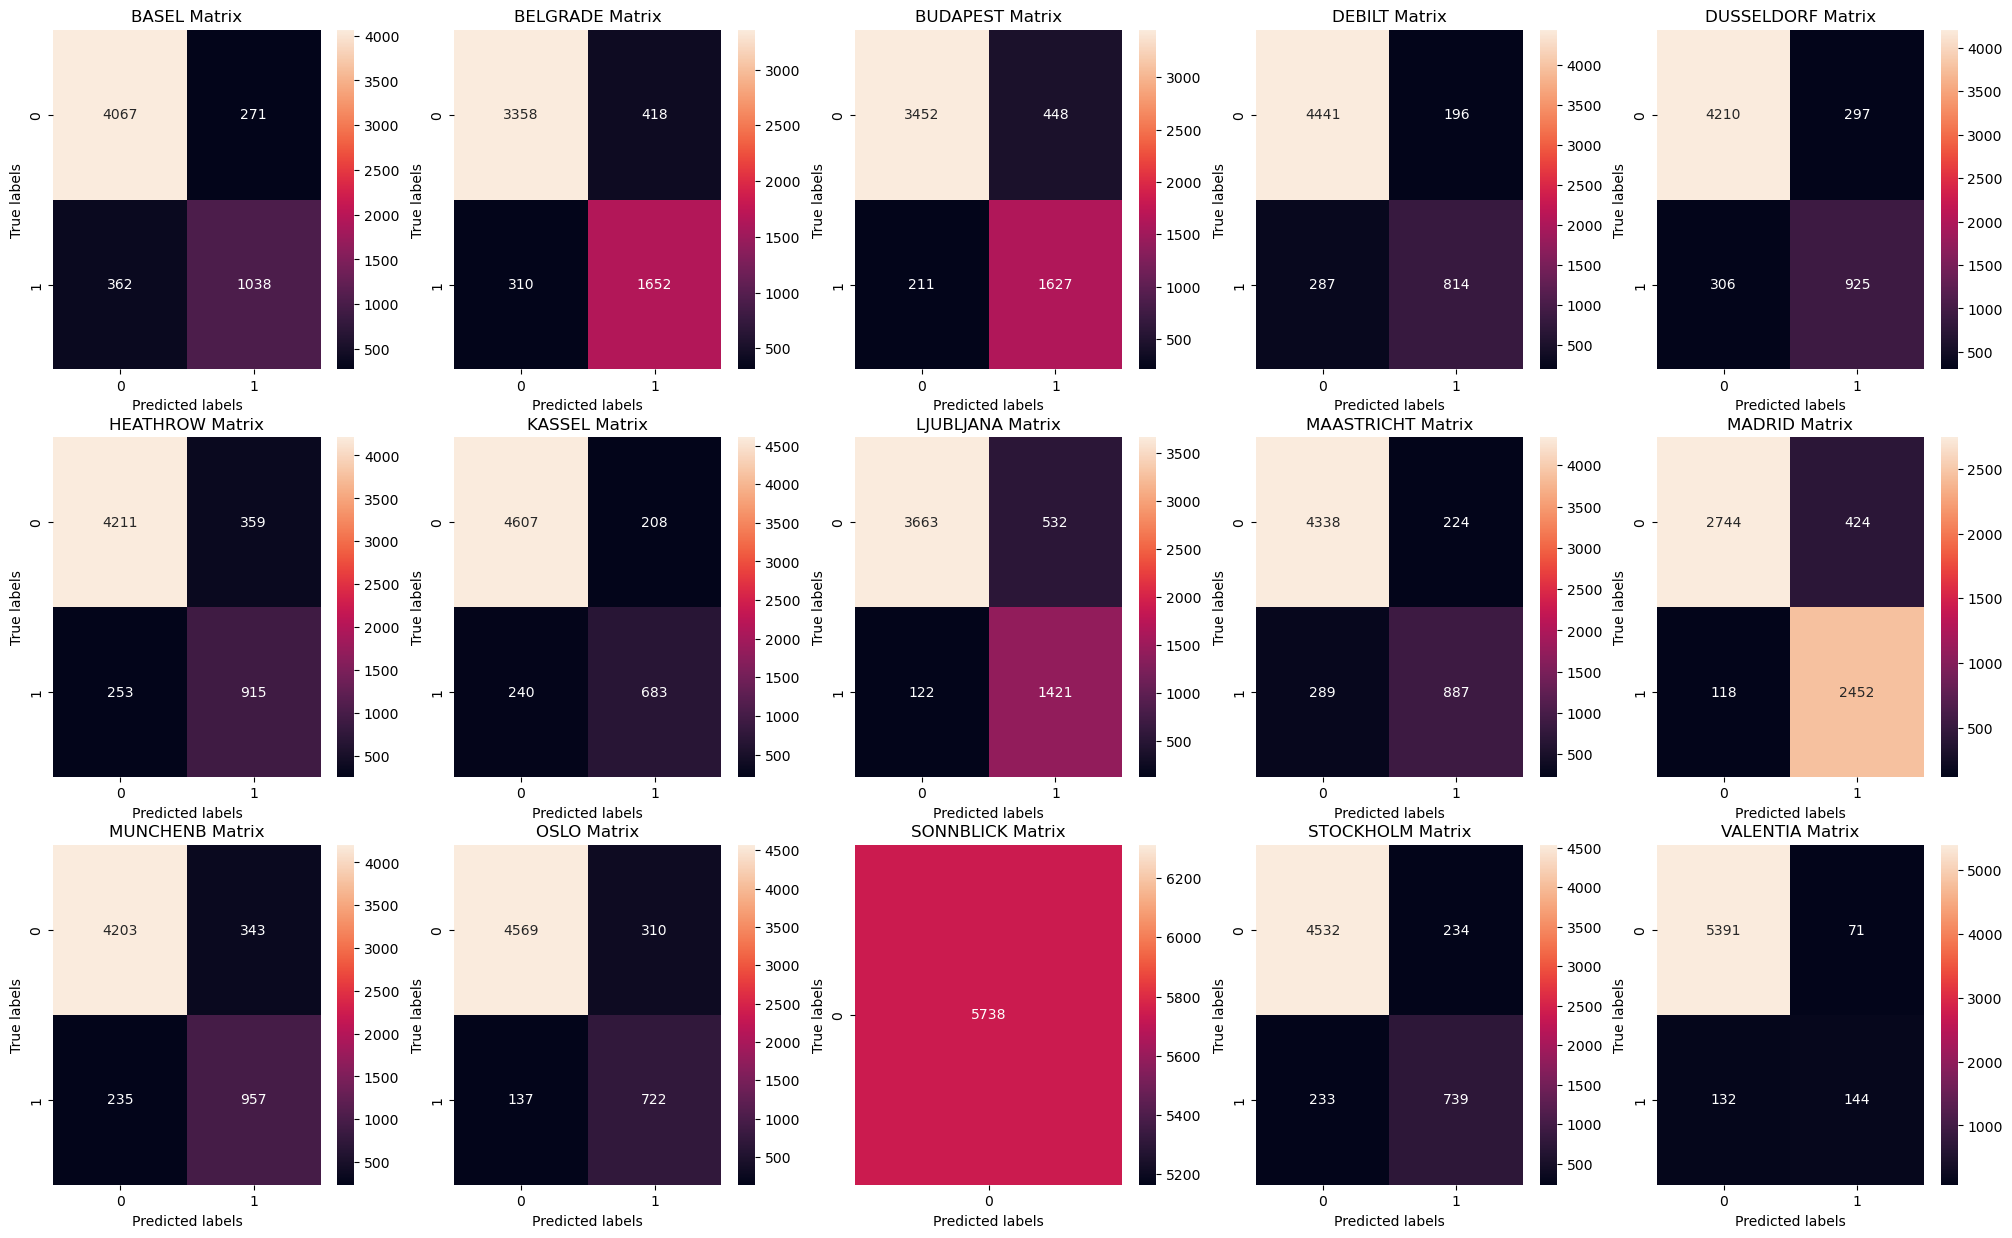

In [90]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ANN_model_test_matrix_3.png"

# Save the figure
figure.savefig(output_file, dpi=300, bbox_inches='tight')

print(f"Figure saved successfully at: {output_file}")

In [ ]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(30, 15, 15), max_iter=1200, tol=0.0001) #testing for plateau in data with increased parameters
#Fit the data to the model
mlp.fit(X_train, y_train)

In [ ]:
# Check accuracy
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

In [ ]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3910,  428],[ 404,  996]],
    [[3210,  566],[ 318, 1644]],
    [[3450,  450],[ 319, 1519]],
    [[4260,  377],[ 360,  741]],
    [[4109,  398],[ 455,  776]],
    [[4083,  487],[ 397,  771]],
    [[4536,  279],[ 297,  626]],
    [[3699,  496],[ 293, 1250]],
    [[4197,  365],[ 351,  825]],
    [[2728,  440],[ 191, 2379]],
    [[4161,  385],[ 327,  865]],
    [[4595,  284],[ 250,  609]],
    [[5738,    0],[   0,    0]],
    [[4493,  273],[ 290,  682]],
    [[5385,   77],[ 204,   72]]
]) #Change array

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

### Model Performance Analysis

The overall accuracy scores for the models are relatively low, indicating that there is room for improvement in terms of prediction performance.

Among the three models tested, **ANN Model 3** emerges as the top performer, achieving the highest accuracy. This can be attributed to the increased complexity of the model architecture, which incorporates additional hidden layers and neurons. As observed, there is a consistent upward trend in accuracy from **Model 1** to **Model 3**, highlighting the positive impact of deeper network structures.

However, it is important to note that when the accuracy scores show only marginal improvements with further architectural changes, it suggests that the model is nearing a performance plateau. This implies that the architecture may have reached its optimal configuration for the given dataset, and any additional complexity may not result in significant gains.

#### Station-Specific Performance

When evaluating the model's performance on individual weather stations, **VALENTIA (Group 15)** has the highest accuracy score among all stations, excluding **SONNBLICK (Group 10)**. This is particularly noteworthy because **SONNBLICK** exhibits a unique case where all weather days are categorized as 'unpleasant,' which limits the model's ability to effectively predict outcomes for this station.

Overall, the findings suggest that further fine-tuning of the model and exploration of additional data features may be necessary to improve its predictive capabilities, especially in cases where the model struggles with certain weather patterns or stations.
